# Avatar questionnaire processing  

## Import packages 

In [53]:
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
import ptitprince as pt
from statsmodels.stats.anova import *
from functools import reduce

## Function creation

1. extraRow: Creates a function that takes:
 - **df** = a data frame and checks if any of the elements of 
 - **yourlist** have a partial match with the content of the values of 
 - **variable** your variable of interest, if so it assigns the correspondedn matching value to 
 - **newvariable** the name of variable you want as an output 


In [54]:
def extraRow(df,yourlist,variable,newVariable):
    '''Creates a new variable that contains matching data from preexiting variable
    
Parameters
-------------
     
     df: your data frame,
     yourlist: List of values you want to target for the partial match search
     variable: Variable that may cointain the elements on yourlist
     newvariable: Name for  New Variable 
     
returns 
----------

    DataFrame
     '''
    for idx, row in df.iterrows():
        for l in yourlist:
            if l in row[variable]:
                df.loc[idx, newVariable] = l

## Preprocessing 

In [55]:
# Data set loading
df_file = '/Users/tracysanchezpacheco/OneDrive/PhD/DataAnalysis/DataAnalysis/AvatarQuestionnaire/AvaQuest.csv'
df = pd.read_csv(df_file, sep= ',', header=None)
df.head()

,0,1,2,3
0,1,Remember_01_CmA,4,4597
1,1,Realistic_01_CmA,3,4597
2,1,Attractive_01_CmA,1,4597
3,2,Remember_29_Sa,1,4597
4,2,Realistic_29_Sa,2,4597


In [56]:
df = df.rename({0: 'order', 1: 'item', 2: 'likert', 3: 'ID'}, axis=1)
df.head()

,order,item,likert,ID
0,1,Remember_01_CmA,4,4597
1,1,Realistic_01_CmA,3,4597
2,1,Attractive_01_CmA,1,4597
3,2,Remember_29_Sa,1,4597
4,2,Realistic_29_Sa,2,4597


In [57]:
#Initial exploration of the data set 
df.item = df['item'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4872 entries, 0 to 4871
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   order   4872 non-null   int64   
 1   item    4872 non-null   category
 2   likert  4872 non-null   int64   
 3   ID      4872 non-null   int64   
dtypes: category(1), int64(3)
memory usage: 129.2 KB


In [58]:
#Creating Clarity Categorical variable 
df['avatarCat'] = df['item'].str.contains('Sa')
df.loc[:, 'avatarCategory'] = df['avatarCat'].replace({True: 'Standing', False: 'Action'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4872 entries, 0 to 4871
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   order           4872 non-null   int64   
 1   item            4872 non-null   category
 2   likert          4872 non-null   int64   
 3   ID              4872 non-null   int64   
 4   avatarCat       4872 non-null   bool    
 5   avatarCategory  4872 non-null   object  
dtypes: bool(1), category(1), int64(3), object(1)
memory usage: 172.0+ KB


In [59]:
df.head()

,order,item,likert,ID,avatarCat,avatarCategory
0,1,Remember_01_CmA,4,4597,False,Action
1,1,Realistic_01_CmA,3,4597,False,Action
2,1,Attractive_01_CmA,1,4597,False,Action
3,2,Remember_29_Sa,1,4597,True,Standing
4,2,Realistic_29_Sa,2,4597,True,Standing


In [60]:
#Checking that value counts for Action and Standing avatars corresponds with the number of participants
df.avatarCat.value_counts()

False    2436
True     2436
Name: avatarCat, dtype: int64

In [61]:
#List of values for iteration search 
itemCat = ['Remember','Realistic', 'Attractive']

#Searching for a partial string 'ItemCat' in variable 'Item' to creat a new variable 'ItemCat'
extraRow(df,itemCat,'item','itemCategory')
df.tail(5)

,order,item,likert,ID,avatarCat,avatarCategory,itemCategory
4867,55,Realistic_06_CmA,4,3310,False,Action,Realistic
4868,55,Attractive_06_CmA,4,3310,False,Action,Attractive
4869,56,Remember_56_Sa,2,3310,True,Standing,Remember
4870,56,Realistic_56_Sa,3,3310,True,Standing,Realistic
4871,56,Attractive_56_Sa,4,3310,True,Standing,Attractive


In [62]:
#Extracting the Avatar number from the variable 'Item'
AvaIDs = []
for idx, row in df.iterrows():
    num = re.findall(r'\d+', row['item']) 
    AvaIDs.append(num)
    #Flatten the list: Every number was returned as a list of it's own with this we get one unified list
    avatarIDsf = [item for sublist in AvaIDs for item in sublist]


In [63]:
#Searching for a partial string contained in the lists "AvatarIDsf" in variable "Item" to creat a new variable "AvatarID"
extraRow(df,avatarIDsf,'item','avatarID')
df.head()

,order,item,likert,ID,avatarCat,avatarCategory,itemCategory,avatarID
0,1,Remember_01_CmA,4,4597,False,Action,Remember,01
1,1,Realistic_01_CmA,3,4597,False,Action,Realistic,01
2,1,Attractive_01_CmA,1,4597,False,Action,Attractive,01
3,2,Remember_29_Sa,1,4597,True,Standing,Remember,29
4,2,Realistic_29_Sa,2,4597,True,Standing,Realistic,29


In [64]:
wide = df.pivot(index='ID', columns='item', values='likert')

In [65]:
os.chdir('/Users/tracysanchezpacheco/Documents/Resources')
df.to_csv('CompleteLargeAvatarQues.cvs')

# Descriptives 

In [66]:
#Average values Support and clarity 
df.groupby([ 'ID', 'avatarCategory','itemCategory'])['likert'].mean()

ID    avatarCategory  itemCategory
365   Action          Attractive      2.214286
                      Realistic       3.392857
                      Remember        2.714286
      Standing        Attractive      1.178571
                      Realistic       1.964286
                                        ...   
9601  Action          Realistic       4.000000
                      Remember        2.964286
      Standing        Attractive      2.678571
                      Realistic       4.000000
                      Remember        2.142857
Name: likert, Length: 174, dtype: float64

In [67]:
#Average values Support and clarity 
df.groupby(['ID','avatarCategory','itemCategory'])['likert'].describe().sort_values(by='mean')

count      mean       std  min   25%  50%  \
ID   avatarCategory itemCategory                                              
3976 Standing       Remember       28.0  1.000000  0.000000  1.0  1.00  1.0   
479  Action         Attractive     28.0  1.000000  0.000000  1.0  1.00  1.0   
2693 Standing       Remember       28.0  1.000000  0.000000  1.0  1.00  1.0   
479  Standing       Attractive     28.0  1.000000  0.000000  1.0  1.00  1.0   
3976 Standing       Attractive     28.0  1.035714  0.188982  1.0  1.00  1.0   
...                                 ...       ...       ...  ...   ...  ...   
6642 Action         Realistic      28.0  3.892857  0.831745  2.0  3.75  4.0   
9601 Standing       Realistic      28.0  4.000000  0.000000  4.0  4.00  4.0   
     Action         Realistic      28.0  4.000000  0.000000  4.0  4.00  4.0   
479  Action         Remember       28.0  4.178571  1.278123  1.0  4.00  5.0   
3976 Action         Realistic      28.0  4.321429  0.722832  2.0  4.00  4.0   

                                  75%  max  
ID   avatarCategory itemCategory            
3976 Standing       Remember      1.0  1.0  
479  Action         Attractive    1.0  1.0  
2693 Standing       Remember      1.0  1.0  
479  Standing       Attractive    1.0  1.0  
3976 Standing       Attractive    1.0  2.0  
...                               ...  ...  
6642 Action         Realistic     4.0  5.0  
9601 Standing       Realistic     4.0  4.0  
     Action         Realistic     4.0  4.0  
479  Action         Remember      5.0  5.0  
3976 Action         Realistic     5.0  5.0  

[174 rows x 8 columns]

In [68]:
AvatarIDsL = df.pivot_table('likert',  'avatarID').sort_values(by='likert')
AvatarIDsL

,likert
avatarID,
33,1.505747
31,1.678161
53,1.678161
37,1.747126
45,1.781609
27,1.850575
39,1.896552
51,1.931034
32,2.000000


## Data Visualization

In [69]:
# General seaborn design settings
sns.set_palette("colorblind")
sns.set_style("white")
sns.set(rc={"figure.figsize":(12, 8)})
sns.set(font_scale = 1.3)

Text(0.5, 0, 'Question category')

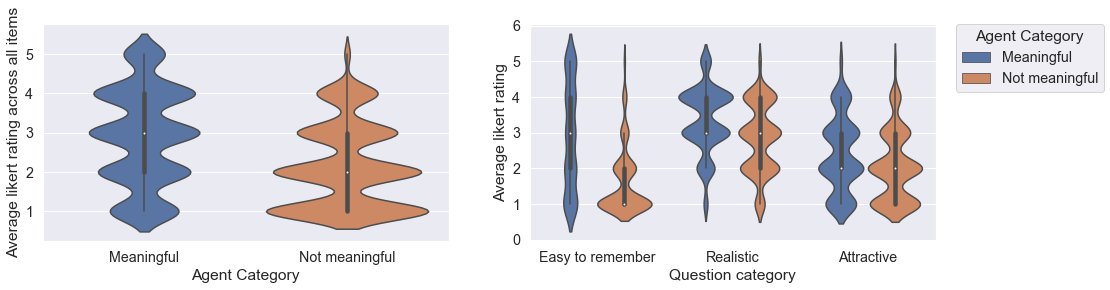

In [70]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,4))

sns.violinplot(data= df, x='avatarCategory', y='likert', ax=axes[0])
axes[0].set_xticklabels(['Active', 'Passive'])
axes[0].set_xlabel('Agent Category')
axes[0].set_ylabel('Average likert rating across all items')

sns.violinplot(data= df, x='itemCategory', y='likert', hue= 'avatarCategory',  ax=axes[1])
#Getting the legend components in order to not lose color when reassigning labels
handles, labels = axes[1].get_legend_handles_labels()
labels = ['Active', 'Passive']
axes[1].legend(handles, labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Agent Category')
axes[1].set_xticklabels(['Easy to remember', 'Realistic', 'Attractive'])
axes[1].set_ylabel('Average likert rating')
axes[1].set_xlabel('Question category')

Text(0.5, 0, 'Question category')

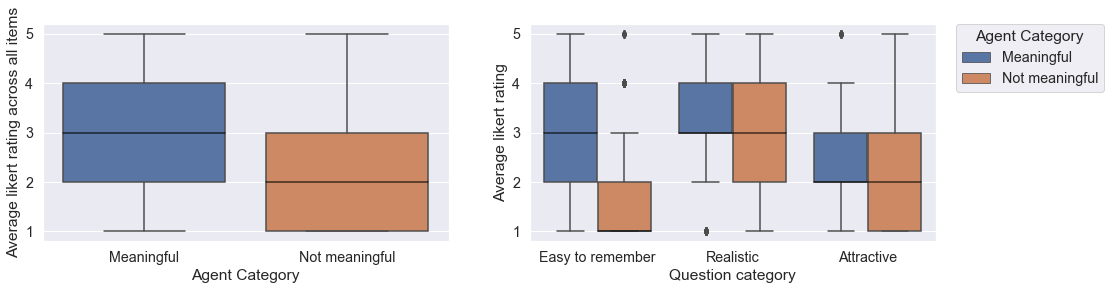

In [71]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,4))

sns.boxplot(data= df, x='avatarCategory', y='likert',   medianprops=dict(color="black", alpha=0.7), ax=axes[0])
axes[0].set_xticklabels(['Meaningful', 'Not meaningful'])
axes[0].set_xlabel('Agent Category')
axes[0].set_ylabel('Average likert rating across all items')

sns.boxplot(data= df, x='itemCategory', y='likert', hue= 'avatarCategory', medianprops=dict(color="black", alpha=0.7), ax=axes[1])
#Getting the legend components in order to not lose color when reassigning labels
handles, labels = axes[1].get_legend_handles_labels()
labels = ['Active', 'Passive']
axes[1].legend(handles, labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Agent Category')
axes[1].set_xticklabels(['Easy to remember', 'Realistic', 'Attractive'])
axes[1].set_ylabel('Average likert rating')
axes[1].set_xlabel('Question category')

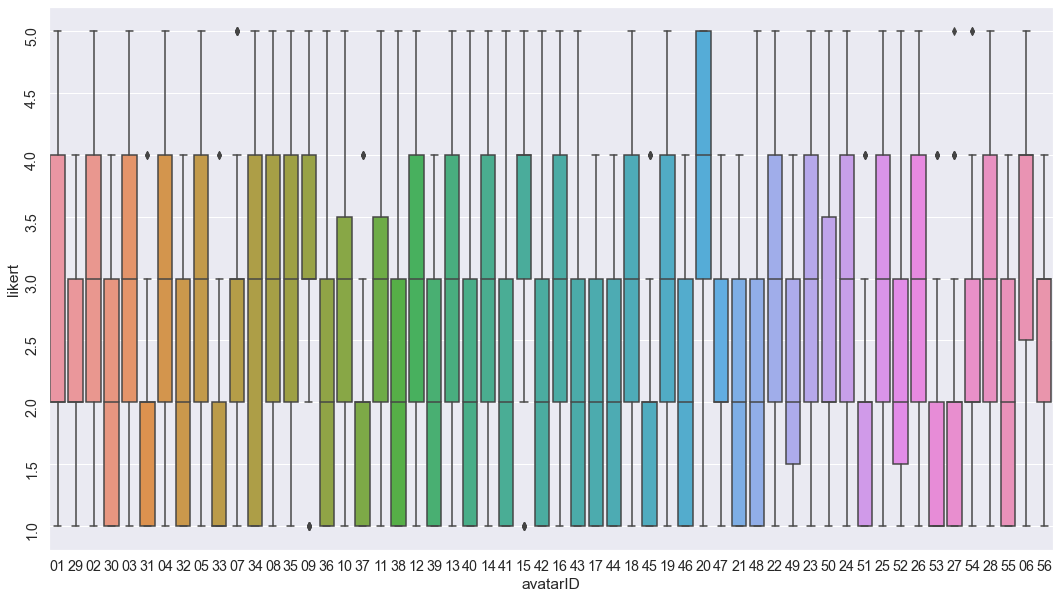

In [97]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(18,10))
sns.boxplot(data= df, x='avatarID', y='likert')
plt.yticks(rotation=90)
plt.show()

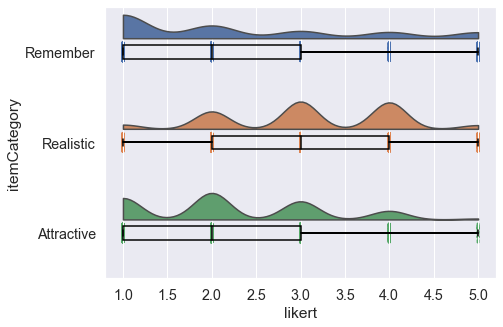

In [73]:
dy='itemCategory'; dx='likert'; ort='h'; pal = sns.color_palette(); sigma = .2
f, ax = plt.subplots(figsize=(7, 5))

ax=pt.half_violinplot( x = dx, y = dy, data = df, palette = pal, bw = .2, cut = 0.,
                      scale = 'area', width = .6, inner = None, orient = ort)
ax=sns.stripplot( x = dx, y = dy, data = df, palette = pal, edgecolor = 'white',
                 size = 3, jitter = 1, zorder = 0, orient = ort)
ax=sns.boxplot( x = dx, y = dy, data = df, color = 'black', width = .15, zorder = 10,\
            showcaps = True, boxprops = {'facecolor':'none', 'zorder':10},\
            showfliers=True, whiskerprops = {'linewidth':2, 'zorder':10},\
               saturation = 1, orient = ort) 

## Data analysis

In [74]:
df.head()

,order,item,likert,ID,avatarCat,avatarCategory,itemCategory,avatarID
0,1,Remember_01_CmA,4,4597,False,Action,Remember,01
1,1,Realistic_01_CmA,3,4597,False,Action,Realistic,01
2,1,Attractive_01_CmA,1,4597,False,Action,Attractive,01
3,2,Remember_29_Sa,1,4597,True,Standing,Remember,29
4,2,Realistic_29_Sa,2,4597,True,Standing,Realistic,29


/Users/tracysanchezpacheco/opt/anaconda3/lib/python3.8/site-packages/factor_analyzer/factor_analyzer.py:111: RuntimeWarning: divide by zero encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)


-inf 1.0
nan


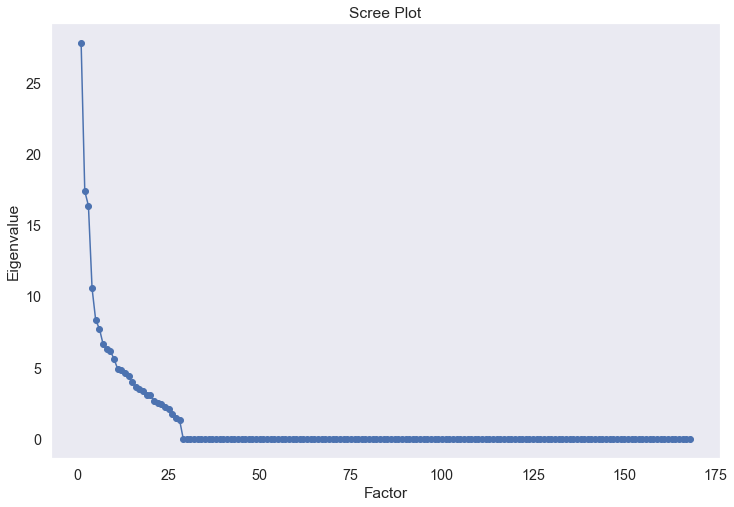

In [75]:
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

#Droppin Nas
wide.dropna(inplace=True);

#Adecuacy test

#Barlets sphericity: A significative p value indicates the date is different from an identity matrix
chi_square_value, p_value = calculate_bartlett_sphericity(wide)
print(chi_square_value, p_value)

# Kaiser-Meyer-Olkin (KMO): Estimates the proportion of variance among all observed variables, less than 0.6 is inadequate
kmo_all, kmo_model = calculate_kmo(wide)
print(kmo_model)
#Create factor analysis object and perform analysis
fa = FactorAnalyzer(rotation='varimax')
fa.fit(wide)

loadings = fa.loadings_

# Get the eigenvector
ev, v = fa.get_eigenvalues()

xvals = range(1, wide.shape[1] + 1)
plt.scatter(xvals, ev)
plt.plot(xvals, ev)
plt.title('Scree Plot')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [76]:
wide = pd.DataFrame(wide)
wide.describe()

item,Attractive_01_CmA,Attractive_02_CmA,Attractive_03_CmA,Attractive_04_CmA,Attractive_05_CmA,Attractive_06_CmA,Attractive_07_CmA,Attractive_08_CmA,Attractive_09_CmA,Attractive_10_CmA,...,Remember_47_Sa,Remember_48_Sa,Remember_49_Sa,Remember_50_Sa,Remember_51_Sa,Remember_52_Sa,Remember_53_Sa,Remember_54_Sa,Remember_55_Sa,Remember_56_Sa
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.00000,29.000000,29.000000,...,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,1.655172,2.827586,2.413793,2.137931,2.206897,2.931034,2.137931,2.37931,3.034483,2.655172,...,1.586207,1.655172,1.620690,1.896552,1.620690,1.965517,1.689655,1.689655,1.482759,1.551724
std,0.768852,1.104179,1.118585,0.915117,0.901559,1.099709,0.742781,0.97884,1.051623,0.897451,...,0.732766,0.856732,0.775232,1.012240,0.820008,0.981353,1.072495,0.760801,0.784706,0.685889
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.00000,3.000000,3.000000,...,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
75%,2.000000,4.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.00000,4.000000,3.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000
max,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,3.000000,5.00000,5.000000,4.000000,...,3.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000


In [77]:
kmo_model

nan

In [78]:
from statsmodels.stats.anova import AnovaRM
help(AnovaRM)

Help on class AnovaRM in module statsmodels.stats.anova:

class AnovaRM(builtins.object)
 |  AnovaRM(data, depvar, subject, within=None, between=None, aggregate_func=None)
 |  
 |  Repeated measures Anova using least squares regression
 |  
 |  The full model regression residual sum of squares is
 |  used to compare with the reduced model for calculating the
 |  within-subject effect sum of squares [1].
 |  
 |  Currently, only fully balanced within-subject designs are supported.
 |  Calculation of between-subject effects and corrections for violation of
 |  sphericity are not yet implemented.
 |  
 |  Parameters
 |  ----------
 |  data : DataFrame
 |  depvar : str
 |      The dependent variable in `data`
 |  subject : str
 |      Specify the subject id
 |  within : list[str]
 |      The within-subject factors
 |  between : list[str]
 |      The between-subject factors, this is not yet implemented
 |  aggregate_func : {None, 'mean', callable}
 |      If the data set contains more than 

<AxesSubplot:title={'center':'likert'}, xlabel='[avatarCategory, itemCategory]'>

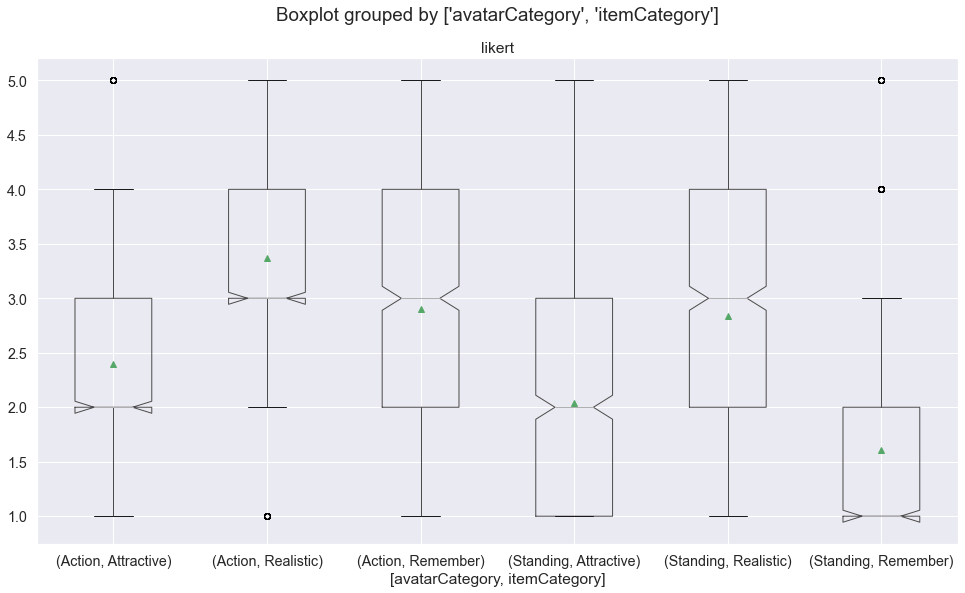

In [79]:
df.boxplot(["likert"], by = ["avatarCategory", "itemCategory"],
           figsize = (16, 9),
           showmeans = True,
           notch = True)

In [80]:
# Separete data set into question category's
df1 = df[df['itemCategory']== 'Remember']
df2 = df[df['itemCategory']== 'Attractive']
df3 = df[df['itemCategory']== 'Realistic']
df1.head()

,order,item,likert,ID,avatarCat,avatarCategory,itemCategory,avatarID
0,1,Remember_01_CmA,4,4597,False,Action,Remember,01
3,2,Remember_29_Sa,1,4597,True,Standing,Remember,29
6,3,Remember_02_CmA,4,4597,False,Action,Remember,02
9,4,Remember_30_Sa,1,4597,True,Standing,Remember,30
12,5,Remember_03_CmA,5,4597,False,Action,Remember,03


In [81]:
#Sum all likert punctuations for the question on how well they remember by participant and avatar category
Topivot = pd.DataFrame(df1.groupby([ 'ID', 'avatarCategory'])['likert'].mean())
#Reformat to a wide dataframe
AvatarSum = pd.DataFrame(Topivot.pivot_table(index='ID', columns='avatarCategory', values='likert'))
AvatarSum.reset_index(drop=True)

avatarCategory,Action,Standing
0,2.714286,1.107143
1,4.178571,2.214286
2,1.678571,1.035714
3,3.464286,1.464286
4,1.642857,1.000000
5,3.357143,1.750000
6,2.464286,1.607143
7,2.250000,1.714286
8,1.892857,1.000000
9,3.000000,1.107143


In [82]:
AvatarSum.rename(columns={
    AvatarSum.columns[0]: 'remember_action_likert',
    AvatarSum.columns[1]: 'remember_standing_likert'}, inplace=True)

In [83]:
#Sum all likert punctuations for the question on how well they remember by participant and avatar category
Topivot1 = pd.DataFrame(df2.groupby([ 'ID', 'avatarCategory'])['likert'].mean())
#Reformat to a wide dataframe
AvatarSum1 = pd.DataFrame(Topivot1.pivot_table(index='ID', columns='avatarCategory', values='likert'))
AvatarSum1.reset_index(drop=True)

avatarCategory,Action,Standing
0,2.214286,1.178571
1,1.000000,1.000000
2,3.107143,2.892857
3,2.142857,2.000000
4,1.714286,1.250000
5,2.392857,2.214286
6,3.107143,2.750000
7,2.607143,2.607143
8,1.035714,1.035714
9,1.607143,1.500000


In [84]:
AvatarSum1.rename(columns={
    AvatarSum1.columns[0]: 'attractive_action_likert',
    AvatarSum1.columns[1]: 'attractive_standing_likert'}, inplace=True)

In [85]:
#Sum all likert punctuations for the question on how well they remember by participant and avatar category
Topivot2 = pd.DataFrame(df3.groupby([ 'ID', 'avatarCategory'])['likert'].mean())
#Reformat to a wide dataframe
AvatarSum2 = pd.DataFrame(Topivot2.pivot_table(index='ID', columns='avatarCategory', values='likert'))
AvatarSum2.reset_index(drop=True)

avatarCategory,Action,Standing
0,3.392857,1.964286
1,3.571429,3.250000
2,3.821429,3.464286
3,3.035714,2.000000
4,3.250000,2.428571
5,3.678571,3.607143
6,3.142857,2.928571
7,2.964286,2.678571
8,4.321429,3.750000
9,3.321429,2.892857


In [86]:
AvatarSum2.rename(columns={
    AvatarSum2.columns[0]: 'realistic_action_likert',
    AvatarSum2.columns[1]: 'realistic_standing_likert'}, inplace=True)

In [87]:
data_frames = [AvatarSum, AvatarSum1, AvatarSum2]
AgentQuest = reduce(lambda  left,right: pd.merge(left,right,on=['ID'],
                                                         how='outer'), data_frames)
AgentQuest.head()

avatarCategory,remember_action_likert,remember_standing_likert,attractive_action_likert,attractive_standing_likert,realistic_action_likert,realistic_standing_likert
ID,,,,,,
365,2.714286,1.107143,2.214286,1.178571,3.392857,1.964286
479,4.178571,2.214286,1.000000,1.000000,3.571429,3.250000
1754,1.678571,1.035714,3.107143,2.892857,3.821429,3.464286
2258,3.464286,1.464286,2.142857,2.000000,3.035714,2.000000
2693,1.642857,1.000000,1.714286,1.250000,3.250000,2.428571


In [88]:
os.chdir('/Users/tracysanchezpacheco/Documents/Resources')
AgentQuest.to_csv('AgentQuest.csv')
wide.to_csv('AvatarQuestWide.csv')

In [89]:
print(AnovaRM(data=df, depvar='likert', subject='ID', within=['avatarCategory', 'itemCategory'], aggregate_func = 'median').fit())

                          Anova
                            F Value Num DF  Den DF Pr > F
---------------------------------------------------------
avatarCategory              84.5833 1.0000 28.0000 0.0000
itemCategory                26.3624 2.0000 56.0000 0.0000
avatarCategory:itemCategory 24.1619 2.0000 56.0000 0.0000



In [90]:
from statsmodels.formula.api import ols, glm
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [91]:
# Define model formula
formula = 'likert  ~ C(avatarCategory, Treatment(reference="Standing")) + C(itemCategory, Treatment(reference="Realistic")) + C(avatarCategory, Treatment(reference="Standing")):C(itemCategory, Treatment(reference="Realistic"))'

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = df, groups=df['ID']).fit()
print(model_LM.summary())
model_LM.t_test(np.array([[0,1,1,0,0,0]]))

                                                                 Mixed Linear Model Regression Results
Model:                                                  MixedLM                                      Dependent Variable:                                      likert    
No. Observations:                                       4872                                         Method:                                                  REML      
No. Groups:                                             29                                           Scale:                                                   1.0239    
Min. group size:                                        168                                          Log-Likelihood:                                          -7022.4640
Max. group size:                                        168                                          Converged:                                               Yes       
Mean group size:                                    

<class 'statsmodels.stats.contrast.ContrastResults'>
                             Test for Constraints                             
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -0.2586      0.087     -2.973      0.003      -0.429      -0.088

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 [Text(0, 0, '365'),
  Text(1, 0, '479'),
  Text(2, 0, '1754'),
  Text(3, 0, '2258'),
  Text(4, 0, '2693'),
  Text(5, 0, '3246'),
  Text(6, 0, '3310'),
  Text(7, 0, '3572'),
  Text(8, 0, '3976'),
  Text(9, 0, '4176'),
  Text(10, 0, '4597'),
  Text(11, 0, '4623'),
  Text(12, 0, '4796'),
  Text(13, 0, '5238'),
  Text(14, 0, '5531'),
  Text(15, 0, '5741'),
  Text(16, 0, '6642'),
  Text(17, 0, '7093'),
  Text(18, 0, '7264'),
  Text(19, 0, '7412'),
  Text(20, 0, '7842'),
  Text(21, 0, '8007'),
  Text(22, 0, '8469'),
  Text(23, 0, '8673'),
  Text(24, 0, '8695'),
  Text(25, 0, '9472'),
  Text(26, 0, '9502'),
  Text(27, 0, '9586'),
  Text(28, 0, '9601')])

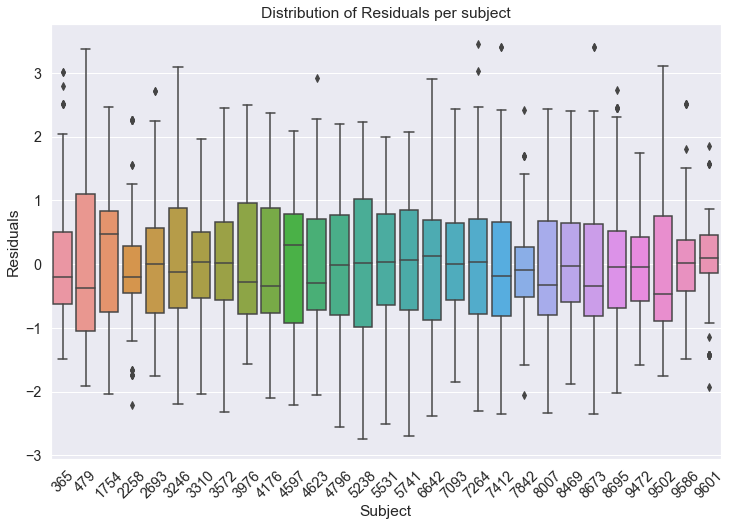

In [92]:
ax = sns.boxplot(x = model_LM.model.groups, y = model_LM.resid)

ax.set_title("Distribution of Residuals per subject")
ax.set_ylabel("Residuals")
ax.set_xlabel("Subject")
plt.xticks(rotation = 45)

In [93]:
df['AgentCat_ItemCat'] =  df['avatarCategory'] + '_' + df['itemCategory']
df.head()

,order,item,likert,ID,avatarCat,avatarCategory,itemCategory,avatarID,AgentCat_ItemCat
0,1,Remember_01_CmA,4,4597,False,Action,Remember,01,Action_Remember
1,1,Realistic_01_CmA,3,4597,False,Action,Realistic,01,Action_Realistic
2,1,Attractive_01_CmA,1,4597,False,Action,Attractive,01,Action_Attractive
3,2,Remember_29_Sa,1,4597,True,Standing,Remember,29,Standing_Remember
4,2,Realistic_29_Sa,2,4597,True,Standing,Realistic,29,Standing_Realistic


In [94]:
df_Dunn = df[['AgentCat_ItemCat', 'likert']]

In [95]:
import scikit_posthocs as sp
posthoc = sp.posthoc_dunn(df_Dunn, val_col='likert', group_col='AgentCat_ItemCat', p_adjust = 'bonferroni')
posthoc

def highlight_sig(s):
    is_sig = s < 0.0019
    return ['background-color: cyan' if v else '' for v in is_sig]
posthoc.style.apply(highlight_sig)

,Action_Attractive,Action_Realistic,Action_Remember,Standing_Attractive,Standing_Realistic,Standing_Remember
Action_Attractive,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Action_Realistic,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
Action_Remember,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
Standing_Attractive,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
Standing_Realistic,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
Standing_Remember,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
